In [1]:
!pip install ordinalgbt

  Using cached ordinalgbt-0.1.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached lightgbm-3.3.5-py3-none-any.whl
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached ordinalgbt-0.1.2-py3-none-any.whl (8.7 kB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)


In [2]:
from ordinalgbt.lgb import LGBMOrdinal
import numpy as np
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
test_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/test_data_v2.csv')
valid_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/validate_data_v2.csv')
train_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/train_data_v2.csv')

In [23]:
train_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Zipcode', 'Weather_Timestamp', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Duration',
       'Region', 'State_CA', 'State_FL', 'State_Others', 'State_TX',
       'City_Charlotte', 'City_Houston', 'City_Los Angeles', 'City_Miami',
       'City_Orlando', 'City_Others', 'Weather_Condition_Encoded',
       'Weather_Condition_Clear / Cloudy',
       'Weather_Condition_Fog / Low Visibility', 'Weather_Condition_Others',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorms / Severe Weather'],
      dtype='object')

In [24]:
train_df.dtypes

ID                                                   object
Severity                                              int64
Start_Time                                            int64
End_Time                                              int64
Distance(mi)                                        float64
Description                                          object
Zipcode                                              object
Weather_Timestamp                                    object
Temperature(F)                                      float64
Humidity(%)                                         float64
Pressure(in)                                        float64
Visibility(mi)                                      float64
Wind_Direction                                       object
Wind_Speed(mph)                                     float64
Precipitation(in)                                   float64
Amenity                                               int64
Bump                                    

In [25]:
train_df.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Zipcode,Weather_Timestamp,Temperature(F),Humidity(%),...,City_Miami,City_Orlando,City_Others,Weather_Condition_Encoded,Weather_Condition_Clear / Cloudy,Weather_Condition_Fog / Low Visibility,Weather_Condition_Others,Weather_Condition_Rain,Weather_Condition_Snow,Weather_Condition_Thunderstorms / Severe Weather
0,A-547872,1,342,372,0.0,Crash on Hard Scrabble Rd at Clemson Rd.,29223-8559,2022-08-03 05:53:00,77.0,88.0,...,0,0,1,0,1,0,0,0,0,0
1,A-6997925,1,907,922,0.0,At OH-87/S Woodland Rd - Accident.,44022,2020-06-03 14:45:00,75.0,65.0,...,0,0,1,0,1,0,0,0,0,0
2,A-539957,1,603,649,0.0,Crash on Rosewood Ave at Nansemond St.,23221-3430,2022-08-11 09:54:00,79.0,84.0,...,0,0,1,0,1,0,0,0,0,0
3,A-556754,1,484,544,0.0,Crash on Gellhorn Dr at Loop Fwy.,77029,2022-07-25 07:53:00,82.0,79.0,...,0,0,0,0,1,0,0,0,0,0
4,A-7040745,1,963,993,0.0,At CR-676A/Bloomingdale Av/Progress BL - Accid...,33578,2020-05-20 15:55:00,86.0,55.0,...,0,0,1,0,1,0,0,0,0,0


In [26]:
train_df[['Description', 'Zipcode', 'Weather_Timestamp', 'Wind_Direction']]

,Description,Zipcode,Weather_Timestamp,Wind_Direction
0,Crash on Hard Scrabble Rd at Clemson Rd.,29223-8559,2022-08-03 05:53:00,CALM
1,At OH-87/S Woodland Rd - Accident.,44022,2020-06-03 14:45:00,W
2,Crash on Rosewood Ave at Nansemond St.,23221-3430,2022-08-11 09:54:00,VAR
3,Crash on Gellhorn Dr at Loop Fwy.,77029,2022-07-25 07:53:00,CALM
4,At CR-676A/Bloomingdale Av/Progress BL - Accid...,33578,2020-05-20 15:55:00,SW
...,...,...,...,...
7995,Incident on MI-55 EB near CAMPBELL RD Road clo...,48661-9084,2021-03-31 06:53:00,W
7996,Crash on WABASH AV / WATERDAM RD / JOFFRE CHER...,15021,2022-11-06 02:51:00,SSW
7997,At Pleasant Hill Rd - Accident.,38118-7412,2020-05-29 15:54:00,NW
7998,Closed at US-220-BR/VA-457/Memorial Blvd - Roa...,24089,2017-01-21 20:15:00,NNE


In [27]:
# Sample DataFrame
# train_df1 = pd.DataFrame({'timestamp': pd.to_datetime(['2025-03-07 14:30:00', '2024-12-25 08:15:00'])})
train_df['Weather_Timestamp'] = pd.to_datetime(train_df['Weather_Timestamp'])
# Extract components
train_df['weather_year'] = train_df['Weather_Timestamp'].dt.year
train_df['weather_month'] = train_df['Weather_Timestamp'].dt.month
train_df['weather_day'] = train_df['Weather_Timestamp'].dt.day
train_df['weather_day_of_week'] = train_df['Weather_Timestamp'].dt.day_name()  # Or .dt.weekday (0=Monday, 6=Sunday)
train_df['weather_hour'] = train_df['Weather_Timestamp'].dt.hour
train_df['weather_minute'] = train_df['Weather_Timestamp'].dt.minute
train_df['Wind_Direction'] = train_df['Wind_Direction'].astype('category')
train_df['weather_day_of_week'] = train_df['weather_day_of_week'].astype('category')

train_df[['Weather_Timestamp','weather_year','weather_month','weather_day_of_week']]

,Weather_Timestamp,weather_year,weather_month,weather_day_of_week
0,2022-08-03 05:53:00,2022,8,Wednesday
1,2020-06-03 14:45:00,2020,6,Wednesday
2,2022-08-11 09:54:00,2022,8,Thursday
3,2022-07-25 07:53:00,2022,7,Monday
4,2020-05-20 15:55:00,2020,5,Wednesday
...,...,...,...,...
7995,2021-03-31 06:53:00,2021,3,Wednesday
7996,2022-11-06 02:51:00,2022,11,Sunday
7997,2020-05-29 15:54:00,2020,5,Friday
7998,2017-01-21 20:15:00,2017,1,Saturday


In [28]:
valid_df['Weather_Timestamp'] = pd.to_datetime(valid_df['Weather_Timestamp'])
# Extract components
valid_df['weather_year'] = valid_df['Weather_Timestamp'].dt.year
valid_df['weather_month'] = valid_df['Weather_Timestamp'].dt.month
valid_df['weather_day'] = valid_df['Weather_Timestamp'].dt.day
valid_df['weather_day_of_week'] = valid_df['Weather_Timestamp'].dt.day_name()  # Or .dt.weekday (0=Monday, 6=Sunday)
valid_df['weather_hour'] = valid_df['Weather_Timestamp'].dt.hour
valid_df['weather_minute'] = valid_df['Weather_Timestamp'].dt.minute
valid_df['Wind_Direction'] = valid_df['Wind_Direction'].astype('category')
valid_df['weather_day_of_week'] = valid_df['weather_day_of_week'].astype('category')

In [29]:
test_df['Weather_Timestamp'] = pd.to_datetime(test_df['Weather_Timestamp'])
# Extract components
test_df['weather_year'] = test_df['Weather_Timestamp'].dt.year
test_df['weather_month'] = test_df['Weather_Timestamp'].dt.month
test_df['weather_day'] = test_df['Weather_Timestamp'].dt.day
test_df['weather_day_of_week'] = test_df['Weather_Timestamp'].dt.day_name()  # Or .dt.weekday (0=Monday, 6=Sunday)
test_df['weather_hour'] = test_df['Weather_Timestamp'].dt.hour
test_df['weather_minute'] = test_df['Weather_Timestamp'].dt.minute
test_df['Wind_Direction'] = test_df['Wind_Direction'].astype('category')
test_df['weather_day_of_week'] = test_df['weather_day_of_week'].astype('category')

In [30]:
train_X = train_df.drop(columns=['Severity','ID','Description','Weather_Timestamp','Zipcode'],inplace=False)
train_y = train_df['Severity']
valid_X = valid_df.drop(columns=['Severity','ID','Description','Weather_Timestamp','Zipcode'],inplace=False)
valid_y = valid_df['Severity']
test_X = test_df.drop(columns=['Severity','ID','Description','Weather_Timestamp','Zipcode'],inplace=False)
test_y = test_df['Severity']

In [31]:
print(train_X.shape)
print(test_X.shape)

(8000, 48)
(1000, 48)


In [32]:
print(train_y)

0       1
1       1
2       1
3       1
4       1
       ..
7995    4
7996    4
7997    4
7998    4
7999    4
Name: Severity, Length: 8000, dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_y1 = encoder.fit_transform(train_y)
valid_y1 = encoder.fit_transform(valid_y)
test_y1 = encoder.fit_transform(test_y)


train_y1

array([0, 0, 0, ..., 3, 3, 3], shape=(8000,))

In [34]:
model = LGBMOrdinal()
model.fit(train_X, train_y1)

LGBMOrdinal(objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x166c81cf0>)

In [35]:
y_pred = model.predict(test_X)
y_pred

array([1, 3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 3, 3, 3,
       1, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 0, 2, 3, 3, 3, 0, 0, 3, 1, 3, 1,
       1, 2, 1, 2, 3, 2, 2, 0, 1, 2, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 1, 1,
       0, 3, 3, 3, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 0, 3, 3, 2, 2,
       2, 3, 1, 3, 0, 1, 3, 0, 3, 3, 3, 0, 2, 3, 3, 3, 0, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 3, 3, 3, 1, 1, 3, 3, 3, 2,
       0, 3, 3, 3, 1, 0, 1, 0, 3, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 1, 3, 1,
       1, 0, 2, 3, 1, 3, 3, 0, 3, 3, 1, 3, 3, 1, 2, 1, 1, 3, 3, 3, 3, 0,
       2, 2, 3, 2, 0, 3, 0, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 1, 0, 3, 2, 1,
       3, 2, 1, 3, 3, 3, 2, 3, 1, 1, 1, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 2,
       0, 1, 0, 3, 1, 3, 0, 1, 1, 3, 3, 3, 1, 2, 1, 1, 3, 1, 1, 3, 0, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 2, 1, 3, 3, 0, 2, 1, 2, 0, 0, 1, 2, 2, 3,
       1, 1, 1, 0, 1, 3, 1, 2, 0, 0, 1, 3, 1, 0, 0, 0, 1, 2, 1, 1, 1, 3,
       1, 3, 3, 2, 0, 3, 3, 1, 3, 0, 1, 0, 0, 3, 0,

In [41]:
y_pred_prob = model.predict_proba(test_X)
y_pred_prob

array([[0.22736849, 0.28960038, 0.26769823, 0.2153329 ],
       [0.10645388, 0.19584928, 0.29369507, 0.40400177],
       [0.02472306, 0.05968922, 0.15449484, 0.76109289],
       ...,
       [0.08011213, 0.16043309, 0.27831585, 0.48113893],
       [0.28543306, 0.30686235, 0.23953217, 0.16817242],
       [0.16231376, 0.25107337, 0.29243781, 0.29417506]], shape=(1000, 4))

# Model Evaluation

## Confusion Matrix

In [36]:
cm = confusion_matrix(test_y1, y_pred)
print(cm)

[[  6   0   0   0]
 [159 279 102 307]
 [ 11  10  24  74]
 [  0   2   1  25]]


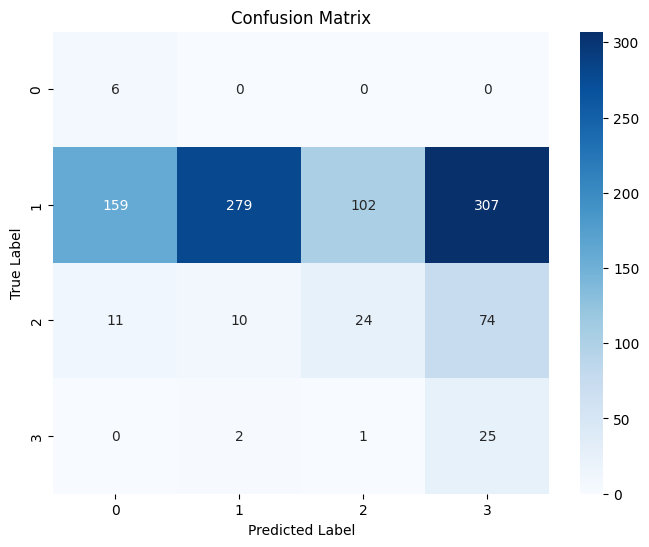

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(train_y1), yticklabels=np.unique(train_y1))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Mean Average Error

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, cohen_kappa_score
from scipy.stats import kendalltau

In [38]:
mae = mean_absolute_error(test_y1, y_pred)
mse = mean_squared_error(test_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(test_y1 - y_pred) <= 1)
f1_macro = f1_score(test_y1, y_pred, average="macro")
f1_weighted = f1_score(test_y1, y_pred, average="weighted")
tau, _ = kendalltau(test_y1, y_pred)
kappa_weighted = cohen_kappa_score(test_y1, y_pred, weights="quadratic")


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)

Mean Absolute Error (MAE): 0.986
Mean Squared Error (MSE): 1.626
Accuracy within 1 class: 0.68
F1-score (Macro): 0.2166493273954706
F1-score (Weighted): 0.44215375256782263
Kendall's Tau: 0.2397523870774554
Weighted Kappa: 0.14695195335411582


## ROC

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

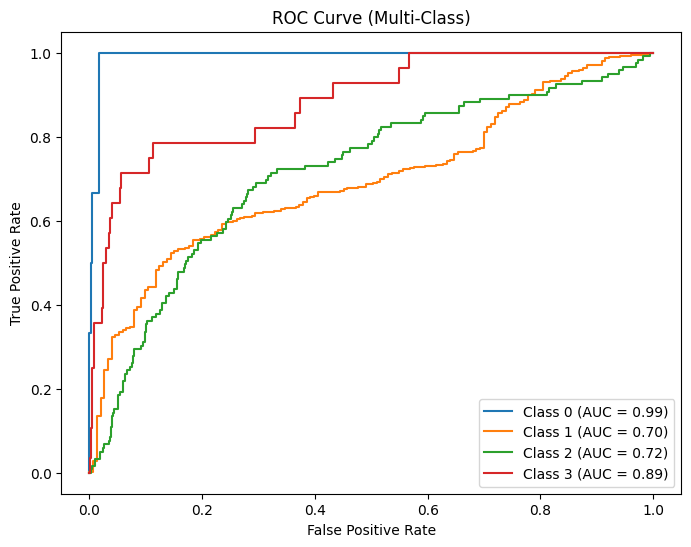

In [42]:
y_true_bin = label_binarize(test_y1, classes=np.unique(test_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()